# COVID-19 Data Analysis
## 1. Introduction
The COVID-19 pandemic was a point of inflexion in the modern society. It beat hard in all countries around the globe, evidencing a lack of preparation for this kind of events. Nevertheless, the response of the society and the deployment of resources was exemplary and determining to finally defeat the desease. A lot of valuable data were generated during all these period that may help us to improve  our actions in the future.<br><br>
### Goal
The purpose of this work is to use different analysis techniques to get a better picture of the pandemic in the European Union (EU) and the European Economic Area (EEA) by using the data available in the European Centre for Disease Prevention and Control website (ECDC): <br>
https://www.ecdc.europa.eu/en/covid-19/data
<br><br>
In this analysis, we're going to focus especially on Spain.
<br><br>
By performing some basic analytics, we will extract some conclusions regarding the evolution of the pandemic in this area.<br><br>
### The data sets
The data sets used are extracted from the ECDC website:
* Data on COVID-19 vaccination in the EU/EEA:<br>https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea
<br>
* Data on hospital and ICU admission rates and current occupancy for COVID-19:<br>https://www.ecdc.europa.eu/en/publications-data/download-data-hospital-and-icu-admission-rates-and-current-occupancy-covid-19
<br>
* Data on testing for COVID-19 by week and country<br>https://www.ecdc.europa.eu/en/publications-data/covid-19-testing
<br>
* Data on 14-day notification rate of new COVID-19 cases and deaths<br>https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19
<br><br>

## 2. First approach: cleaning and understanding the data
In this section, we will perform some basic analysis of the available data. First, we need to take a look at the data, format and clean it if necessary. Then, we will try to understand better what are we dealing with to be able to get some valuable insights<br><br>


### Import libraries and data sets
First of all, import the necesary libraries and the data sets.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [2]:
new_cases_deaths = pd.read_csv('14-days-new-cases-and-deaths.csv')
ICU_adm = pd.read_csv('ICU-admissions.csv')
testing = pd.read_csv('testing.csv')
vaccination = pd.read_csv('vaccination.csv')
print('Data stored in data frames')

Data stored in data frames


We can also set the style of the plots.

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
matplotlib.style.use('seaborn-v0_8')

In [44]:
pd.options.mode.copy_on_write = True

### Understanding the data
It's crucial to better undertand what are we dealing with. The format and type of data, or what specific data is included is something to get familiar with. Let's check the first rows of each data set and the data types. It is also good to take a look to the csv file.

#### New cases and deaths
This one contains weekly data on 14-day notification rate of new COVID-19 cases and deaths reported.

In [5]:
new_cases_deaths.head()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Austria,AUT,Europe,8978929,cases,NaN,2020-01,NaN,NaN,TESSy COVID-19,NaN
1,Austria,AUT,Europe,8978929,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
2,Austria,AUT,Europe,8978929,cases,NaN,2020-03,NaN,NaN,TESSy COVID-19,NaN
3,Austria,AUT,Europe,8978929,cases,NaN,2020-04,NaN,NaN,TESSy COVID-19,NaN
4,Austria,AUT,Europe,8978929,cases,NaN,2020-05,NaN,NaN,TESSy COVID-19,NaN


In [6]:
new_cases_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           12648 non-null  object 
 1   country_code      12240 non-null  object 
 2   continent         12648 non-null  object 
 3   population        12648 non-null  int64  
 4   indicator         12648 non-null  object 
 5   weekly_count      11783 non-null  float64
 6   year_week         12648 non-null  object 
 7   rate_14_day       11683 non-null  float64
 8   cumulative_count  11783 non-null  float64
 9   source            12648 non-null  object 
 10  note              0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.1+ MB


In this first data set, we can see that the data are already quite clean, with the proper format. Some of these data won't be useful for our analysis, but we'll get to that later. For now, only mention that the variable 'indicator' it's categorical, and it determines if it's a new case (cases) or a decease (deaths).<br>
We also face another problem here, which is the fact that we only have the week in which the data were taken, there's not a specific date. We have to check the rest of data sets to confirm the format of these dates.

#### ICU admissions
ICU admission rates and current occupancy for COVID-19 cases.

In [7]:
ICU_adm.head()

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.0,Country_Website,NaN
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.0,Country_Website,NaN
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.0,Country_Website,NaN
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.0,Country_Website,NaN
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.0,Country_Website,NaN


In [8]:
ICU_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28337 entries, 0 to 28336
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    28337 non-null  object 
 1   indicator  28337 non-null  object 
 2   date       28337 non-null  object 
 3   year_week  28337 non-null  object 
 4   value      28337 non-null  float64
 5   source     28337 non-null  object 
 6   url        0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.5+ MB


Again, the data are quite usable already. We'll delete the useless columns and the data set will be almost ready. Note that there's a categoriacal variable 'indicator', which poits out the daily or weekly admissions, both in ICU and normal hospital occupancy.<br>
About the format of the dates, it's by week, but slightly different from the data of the previous data set. We will need to homogenize.

#### Testing data
These are the testing data by week and country.

In [9]:
testing.head()

,country,country_code,year_week,level,region,region_name,new_cases,tests_done,population,testing_rate,positivity_rate,testing_data_source
0,Austria,AT,2020-W01,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
1,Austria,AT,2020-W02,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
2,Austria,AT,2020-W03,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
3,Austria,AT,2020-W04,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN
4,Austria,AT,2020-W05,national,AT,Austria,NaN,NaN,8978929,NaN,NaN,NaN


In [10]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              6120 non-null   object 
 1   country_code         6120 non-null   object 
 2   year_week            6120 non-null   object 
 3   level                6120 non-null   object 
 4   region               6120 non-null   object 
 5   region_name          6120 non-null   object 
 6   new_cases            5812 non-null   float64
 7   tests_done           4991 non-null   float64
 8   population           6120 non-null   int64  
 9   testing_rate         4991 non-null   float64
 10  positivity_rate      4966 non-null   float64
 11  testing_data_source  4991 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 573.9+ KB


#### Vaccination
Vaccination data.

In [11]:
vaccination.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2022-W46,AT,260101.0,0.0,0.0,0,NaN,0,0,1,0,0,0,0,AT,Age15_17,VLA,8978929
1,2022-W26,AT,431785.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age0_4,AZ,8978929
2,2022-W26,AT,424628.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age10_14,AZ,8978929
3,2022-W26,AT,260101.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age15_17,AZ,8978929
4,2022-W26,AT,676675.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age18_24,AZ,8978929


In [12]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815284 entries, 0 to 815283
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YearWeekISO          815284 non-null  object 
 1   ReportingCountry     815284 non-null  object 
 2   Denominator          438364 non-null  float64
 3   NumberDosesReceived  107926 non-null  float64
 4   NumberDosesExported  105957 non-null  float64
 5   FirstDose            815284 non-null  int64  
 6   FirstDoseRefused     1447 non-null    float64
 7   SecondDose           815284 non-null  int64  
 8   DoseAdditional1      815284 non-null  int64  
 9   DoseAdditional2      815284 non-null  int64  
 10  DoseAdditional3      815284 non-null  int64  
 11  DoseAdditional4      815284 non-null  int64  
 12  DoseAdditional5      815284 non-null  int64  
 13  UnknownDose          815284 non-null  int64  
 14  Region               815284 non-null  object 
 15  TargetGroup      

### Data cleaning
There's some work to do before starting analysing the data. We have to clean them a bit, deleteting the useless columns of each data frame, homogenize the format and finaly merge them.

#### Delete useless columns
We'll start deleting what we won't need. things like the source or notes won't be needed. We can also set the name of the country as the first column.

In [13]:
# new cases and deaths
new_cases_deaths.drop(['source','note','continent'], axis=1, inplace=True)
# new_cases_deaths.set_index('country', inplace=True)
new_cases_deaths.head()

,country,country_code,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count
0,Austria,AUT,8978929,cases,NaN,2020-01,NaN,NaN
1,Austria,AUT,8978929,cases,NaN,2020-02,NaN,NaN
2,Austria,AUT,8978929,cases,NaN,2020-03,NaN,NaN
3,Austria,AUT,8978929,cases,NaN,2020-04,NaN,NaN
4,Austria,AUT,8978929,cases,NaN,2020-05,NaN,NaN


In [22]:
ICU_adm.drop(['source','url','date'], axis=1, inplace=True)
ICU_adm.set_index('country', inplace=True)  
ICU_adm.head()

,indicator_occupancy,year_week,value
country,,,
Austria,Daily hospital occupancy,2020-W14,856.0
Austria,Daily hospital occupancy,2020-W14,823.0
Austria,Daily hospital occupancy,2020-W14,829.0
Austria,Daily hospital occupancy,2020-W14,826.0
Austria,Daily hospital occupancy,2020-W14,712.0


In [14]:
testing.drop(['level','region','region_name','testing_data_source'], axis=1, inplace=True)
testing.set_index('country',inplace=True)
testing.head()

,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate
country,,,,,,,
Austria,AT,2020-W01,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W02,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W03,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W04,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W05,NaN,NaN,8978929,NaN,NaN


In [648]:
vaccination.drop(['Denominator','Region','Vaccine','FirstDoseRefused'], axis=1, inplace=True)
vaccination.rename(columns={'YearWeekISO': 'year_week', 'ReportingCountry': 'country_code'}, inplace=True)
vaccination.head(10)

,year_week,country_code,NumberDosesReceived,NumberDosesExported,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,TargetGroup,Population
0,2022-W46,AT,0.0,0.0,0,0,0,1,0,0,0,0,Age15_17,8978929
1,2022-W26,AT,0.0,0.0,0,0,0,0,0,0,0,0,Age0_4,8978929
2,2022-W26,AT,0.0,0.0,0,0,0,0,0,0,0,0,Age10_14,8978929
3,2022-W26,AT,0.0,0.0,0,0,0,0,0,0,0,0,Age15_17,8978929
4,2022-W26,AT,0.0,0.0,0,0,0,0,0,0,0,0,Age18_24,8978929
5,2022-W26,AT,0.0,0.0,0,0,0,2,0,0,0,0,Age25_49,8978929
6,2022-W26,AT,0.0,0.0,0,0,0,0,0,0,0,0,Age5_9,8978929
7,2022-W46,AT,0.0,0.0,5,3,0,2,0,0,0,0,Age18_24,8978929
8,2022-W46,AT,0.0,0.0,14,12,6,28,1,0,0,0,Age25_49,8978929
9,2021-W37,AT,0.0,0.0,55,25,87,1,0,0,0,0,Age80+,8932664


For this analysis, we're not going to focus in how many first, second or any additional doses were given, so we can just summ all the doses administrated in each week by summing them up. It could be interesting though, to measure how many people had at least a second dose, which means fully completed vaccination.

In [284]:
# We first get the columns of doses
dose_col = []
for col in vaccination.columns:
    if 'Dose' in col:
        dose_col.append(col)


dose_col = dose_col[2:]
print(dose_col)

['FirstDose', 'SecondDose', 'DoseAdditional1', 'DoseAdditional2', 'DoseAdditional3', 'DoseAdditional4', 'DoseAdditional5', 'UnknownDose']


In [670]:
vacc_aggregated = vaccination.drop(['TargetGroup','NumberDosesReceived','NumberDosesExported'], axis=1)
vacc_aggregated.head()
vacc_aggregated.groupby(['country_code','year_week']).sum()
vacc_aggregated['TotalDoses'] = vacc_aggregated[dose_col].sum(axis=1)
vacc_aggregated.head(15)

,year_week,country_code,FirstDose,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Population,TotalDoses
0,2022-W46,AT,0,0,0,1,0,0,0,0,8978929,1
1,2022-W26,AT,0,0,0,0,0,0,0,0,8978929,0
2,2022-W26,AT,0,0,0,0,0,0,0,0,8978929,0
3,2022-W26,AT,0,0,0,0,0,0,0,0,8978929,0
4,2022-W26,AT,0,0,0,0,0,0,0,0,8978929,0
5,2022-W26,AT,0,0,0,2,0,0,0,0,8978929,2
6,2022-W26,AT,0,0,0,0,0,0,0,0,8978929,0
7,2022-W46,AT,5,3,0,2,0,0,0,0,8978929,10
8,2022-W46,AT,14,12,6,28,1,0,0,0,8978929,61
9,2021-W37,AT,55,25,87,1,0,0,0,0,8932664,168


In [671]:
# Leave this data set with just the total number of doses per week
vacc_aggregated = vacc_aggregated.drop(dose_col[2:], axis=1)
vacc_aggregated.rename(columns={'Total':'TotalDoses'})
vacc_aggregated.set_index('year_week',inplace=True)
vacc_aggregated.sort_values(['country_code','year_week'], inplace=True)
vacc_aggregated.head()

,country_code,FirstDose,SecondDose,Population,TotalDoses
year_week,,,,,
2020-W53,AT,0,0,8901064,0
2020-W53,AT,0,0,8901064,0
2020-W53,AT,0,0,8901064,0
2020-W53,AT,0,0,8901064,0
2020-W53,AT,0,0,8901064,0


This will require more cleaning, since there are many rows for the same week and country. The thing is, that each of them represents a particular group of age and a specific vaccine, information we decided wouldn't be useful. So, when we get the data for a specific country, we will add up all the values for every 'year_week'.

### Further cleaning
The first data set, cases and deaths, has different issues that must be fixed:<br>
* The country code doesn't corresponds to the other data sets. It has 3 characters instead of 2, so we might drop it at solve it when merging datasets.
* The year_week column also has a difference: there's no 'W' to indicate the week. We need to homogenize with respect to the other data sets by adding it.
* Eventually, there are other indicators in other data sets, so we can rename the column to avoid information overlaps.

In [23]:
new_cases_deaths.drop('country_code',axis=1,inplace=True)

# add 'W' to the year_week column
year_week_new = []
for week in new_cases_deaths['year_week']:
    add_W = week[:5] + 'W' + week[5:]
    year_week_new.append(add_W)
new_cases_deaths['year_week'] = year_week_new

new_cases_deaths.rename(columns={'indicator': 'indicator_cases_deaths'}, inplace=True)
new_cases_deaths.head()

,country,population,indicator_cases_deaths,weekly_count,year_week,rate_14_day,cumulative_count
0,Austria,8978929,cases,NaN,2020-W01,NaN,NaN
1,Austria,8978929,cases,NaN,2020-W02,NaN,NaN
2,Austria,8978929,cases,NaN,2020-W03,NaN,NaN
3,Austria,8978929,cases,NaN,2020-W04,NaN,NaN
4,Austria,8978929,cases,NaN,2020-W05,NaN,NaN


In the ICU occupancy data, we can change the name of the column with the indicator of occupancy

In [24]:
ICU_adm.rename(columns={'indicator':'indicator_occupancy'}, inplace=True)
ICU_adm.head()

,indicator_occupancy,year_week,value
country,,,
Austria,Daily hospital occupancy,2020-W14,856.0
Austria,Daily hospital occupancy,2020-W14,823.0
Austria,Daily hospital occupancy,2020-W14,829.0
Austria,Daily hospital occupancy,2020-W14,826.0
Austria,Daily hospital occupancy,2020-W14,712.0


## 3. Getting insights from visualization

Now, we can start analyzing the data to get some information. For that, we will apply some visualization techniques and see what's hidden within these datasets. We will focus on Spain and see some of the effects of the virus over the population, in terms of infection, deaths and hospital/ICU occupancy.

### Infection cases and deaths by COVID-19 in Spain
First, let's get a list with all the names of the countries to know how to access them.

In [30]:
countries = []
for country in new_cases_deaths['country']:
    if country not in countries:
        countries.append(country)
countries.remove('EU/EEA (total)')
print(countries)

['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']


Now, we can focus on specific countries. Let's take Spain, for example. We can get the cases and deaths in this country and plot them to see how it went during the pandemic.<br><br>
We can generate a new data frame for infection the cases and another one for the deaths. Then, we will plot them to see the evolution.

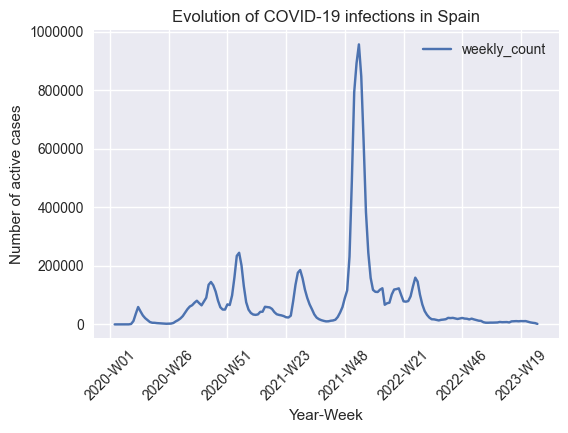

In [352]:
# infection cases
cases_spain = new_cases_deaths[(new_cases_deaths['country']=='Spain') & (new_cases_deaths['indicator_cases_deaths'] == 'cases')]
cases_spain.reset_index()
cases_spain.set_index('year_week')

cases_spain.plot(x='year_week', y='weekly_count', figsize=(6,4))
plt.xticks(rotation = 45)
plt.title('Evolution of COVID-19 infections in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of active cases')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)  # removes scientific notation

plt.show()

We can see several waves along all the period between 2020 and 2023. There's one peak specially high by the beginning of 2022 that we will need to investigate further.

Let us now check the deaths evolution in Spain.

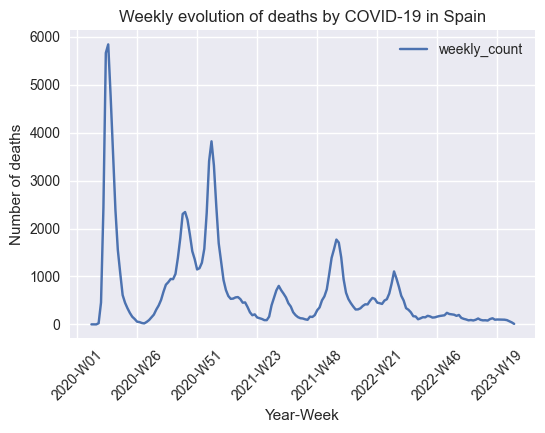

In [231]:
deaths_spain = new_cases_deaths[(new_cases_deaths['country']=='Spain') & (new_cases_deaths['indicator_cases_deaths'] == 'deaths')]
deaths_spain.reset_index()
deaths_spain.set_index('year_week')

deaths_spain.plot(x='year_week', y=['weekly_count'], figsize=(6,4))
plt.xticks(rotation = 45)
plt.title('Weekly evolution of deaths by COVID-19 in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of deaths')

plt.show()

Here, we can see the devastating effect of the virus at the beginning of the pandemic. Despite the restrictions, there were several waves along all the timeframe. Fortunately, the effects both of these restrictions and the high vaccination rate in the country helped to decrease this trend.

### Hospital and ICU occupancy
So, another interesting insight could be the ICU occupancy at the Spanish hospitals. During the pandemic, these units were quite overloaded, specially at the beginning.<br><br>
Let's get the indicators in the ICU dataset.

In [34]:
icu_ind = []
for ind in ICU_adm['indicator_occupancy']:
    if ind not in icu_ind:
        icu_ind.append(ind)
print(icu_ind)

['Daily hospital occupancy', 'Daily ICU occupancy', 'Weekly new hospital admissions per 100k', 'Weekly new ICU admissions per 100k']


Then, get the data from Spain.

In [233]:
icu_spain = ICU_adm[ICU_adm.index=='Spain']
icu_spain.reset_index(inplace=True)
# icu_spain.set_index('year_week', inplace=True)

icu_spain.head()

,country,indicator_occupancy,year_week,value
0,Spain,Daily hospital occupancy,2020-W34,4636.0
1,Spain,Daily hospital occupancy,2020-W34,4703.0
2,Spain,Daily hospital occupancy,2020-W35,5484.0
3,Spain,Daily hospital occupancy,2020-W35,5688.0
4,Spain,Daily hospital occupancy,2020-W35,5903.0


We face a problem with this data frame. The data were taken in different days of the same week, that's why the "year_week" value appears repeated in several rows. We're interested only in one value per each year week, so we can take the last taken in each week and consider it.<br><br>

In [234]:
icu_spain.drop_duplicates(['indicator_occupancy','year_week'],keep='last',inplace=True)
icu_spain.drop('country',axis=1,inplace=True)
icu_spain.reset_index(inplace=True)
icu_spain.drop('index',axis=1,inplace=True)
icu_spain.head()

,indicator_occupancy,year_week,value
0,Daily hospital occupancy,2020-W34,4703.0
1,Daily hospital occupancy,2020-W35,6224.0
2,Daily hospital occupancy,2020-W36,7392.0
3,Daily hospital occupancy,2020-W37,8658.0
4,Daily hospital occupancy,2020-W38,10143.0


We can put the ordinary hospital occupancy data in a new data frame.

In [169]:
sp_daily_occ = icu_spain[(icu_spain['indicator_occupancy']=='Daily hospital occupancy') & (icu_spain['year_week'])]
sp_daily_occ.reset_index(inplace=True)
sp_daily_occ.drop(['index','indicator_occupancy'],axis=1,inplace=True)
sp_daily_occ.rename(columns={'value':'Hospital_occupancy'},inplace=True)
sp_daily_occ.head()

,year_week,Hospital_occupancy
0,2020-W34,4703.0
1,2020-W35,6224.0
2,2020-W36,7392.0
3,2020-W37,8658.0
4,2020-W38,10143.0


Let's do the same with the ICU occupancy.

In [170]:
sp_daily_icu = icu_spain[(icu_spain['indicator_occupancy']=='Daily ICU occupancy') & (icu_spain['year_week'])]
sp_daily_icu.reset_index(inplace=True)
sp_daily_icu.drop(['index','indicator_occupancy'],axis=1,inplace=True)
sp_daily_icu.rename(columns={'value':'ICU_occupancy'},inplace=True)

sp_daily_icu.head()

,year_week,ICU_occupancy
0,2020-W40,1566.0
1,2020-W41,1590.0
2,2020-W42,1739.0
3,2020-W43,2031.0
4,2020-W44,2482.0


As we can see, comparing both new data frames, thay start in different weeks. We can add weeks 34 to 35 to the ICU occupancy data frame to make sure both start at the same time and avoid data displacement in the plots.

In [171]:
df_init = pd.DataFrame({
    'year_week': ['2020-W34','2020-W35','2020-W36','2020-W37','2020-W38','2020-W39'],
    'ICU_occupancy': [0.0,0.0,0.0,0.0,0.0,0.0]
})
sp_daily_icu_concat = pd.concat([df_init, sp_daily_icu])

sp_daily_occ.set_index('year_week',inplace=True)
sp_daily_icu_concat.set_index('year_week',inplace=True)

Here, we generate an area plot, which will be useful to see both series in the same plot.

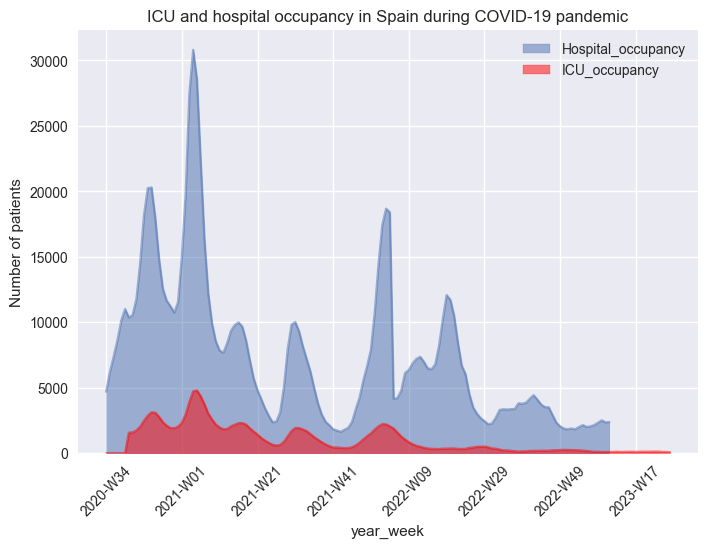

In [176]:
ax = sp_daily_occ.plot(kind='area',stacked=False)
sp_daily_icu_concat.plot(kind='area', ax=ax, color='red',alpha=0.5)

ax.set_title('ICU and hospital occupancy in Spain during COVID-19 pandemic')
ax.set_ylabel('Number of patients')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

This one is extremely interesting, as we see the evolution of the hospital and ICU occupancy. Cheking this in detail, the different waves totally fit together. Even though there is a clear tendency to decrease, again we face the pick at the beginning of 2022, where the infections almost got to 1 million people in a week. Therefore, the hospital and ICU occupancy also increased by that time.<br><br>
Despite all of this, the numbers of the occupancy in that period of 2022 art less severe than the first 2 years of the pandemic. This is were the effects of vaccination stand out.<br><br>
We can also say that there's a lack of data for more than a half of the first year. This is probably due to the source and we probably should check out some national entities in the case of Spain to get more amount of data.

### Vaccination data
Spain had one of the highest vaccination rates in Europe. It will be interesting to see the possible effects of this fact on the evolution of the pandemic here. Let's first get a data frame with the total doses and the population (the latter could be useful if we want to compare to other countries).

In [325]:
vacc_spain = vacc_aggregated[vacc_aggregated['country_code']=='ES']
vacc_spain.reset_index(inplace=True)
vacc_spain = vacc_spain.groupby(['year_week','Population'], as_index=False)['TotalDoses'].sum()
vacc_spain.set_index('year_week',inplace=True)
vacc_spain.head()

,Population,TotalDoses
year_week,,
2020-W53,47332614,286197
2021-W01,47398695,963272
2021-W02,47398695,1511391
2021-W03,47398695,1007770
2021-W04,47398695,1110202


Another useful data is the number of second doses to see how many people have complete vaccination. We can see the cumulative too.

In [328]:
vacc_spain_2d = vacc_aggregated[vacc_aggregated['country_code']=='ES']
vacc_spain_2d.reset_index(inplace=True)
vacc_spain_2d = vacc_spain_2d.groupby(['year_week'], as_index=False)['SecondDose'].sum()
vacc_spain_2d['Second_Dose_Cumulative'] = vacc_spain_2d['SecondDose'].cumsum()
vacc_spain_2d.set_index('year_week',inplace=True)
vacc_spain_2d.head()

,SecondDose,Second_Dose_Cumulative
year_week,,
2020-W53,0,0
2021-W01,0,0
2021-W02,6085,6085
2021-W03,260596,266681
2021-W04,857996,1124677


Join both data frames and then plot them.

In [346]:
sp_vaccination = vacc_spain.join(vacc_spain_2d, how='inner').reset_index()
sp_vaccination.head()

,year_week,Population,TotalDoses,SecondDose,Second_Dose_Cumulative
0,2020-W53,47332614,286197,0,0
1,2021-W01,47398695,963272,0,0
2,2021-W02,47398695,1511391,6085,6085
3,2021-W03,47398695,1007770,260596,266681
4,2021-W04,47398695,1110202,857996,1124677


#### Total doses

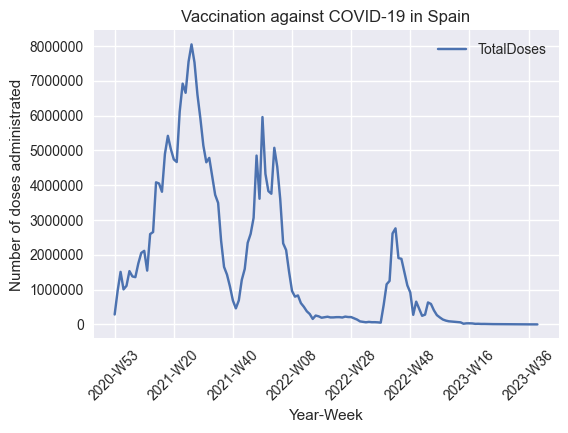

In [355]:
sp_vaccination.plot(x='year_week', y='TotalDoses', figsize=(6,4))
plt.xticks(rotation = 45)
plt.title('Vaccination against COVID-19 in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of doses administrated')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

The vaccination numbers along 2021 are quite remarkable. The efforts made by the country to immunize the population can be seen in the plot: there's a pick of 8 million doses in just a week. In the first wave of vaccinations there are probably first and some second doses already. Then, the second wave can be due to the rest of second doses. Further, it's likely reinforcement doses that not everybody took.

#### Cumulative of second doses in Spain

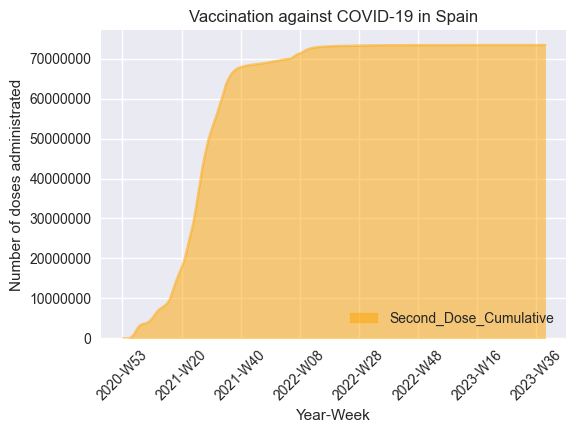

In [393]:
sp_vaccination.plot(kind='area', x='year_week', y=['Second_Dose_Cumulative'], figsize=(6,4), color='orange', alpha=0.5)
plt.xticks(rotation = 45)
plt.title('Vaccination against COVID-19 in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of doses administrated')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [387]:
print(sp_vaccination.iloc[53])
vacc_perc = sp_vaccination.iloc[53]['Second_Dose_Cumulative']*0.5/sp_vaccination.iloc[53]['Population']*100
print('The percentage of population with at least 2 doses of the vaccine by the beginning of 2022 is: ', round(vacc_perc, 1), '%')

year_week                 2022-W01
Population                47432893
TotalDoses                 3756952
SecondDose                  121611
Second_Dose_Cumulative    69516132
Name: 53, dtype: object
The percentage of population with at least 2 doses of the vaccine by the beginning of 2022 is:  73.3 %


There was such a huge effort to get the population immunized that in one year over the 70 % pf the people had at least 2 doses of the vaccine.<br><br>
We can also check the maximum number of doses administrated.

In [389]:
print('Maximum of 2 doses:', sp_vaccination['Second_Dose_Cumulative'].max())
max_vac = sp_vaccination['Second_Dose_Cumulative'].max()*0.5/sp_vaccination.iloc[62]['Population']*100
print('Maximum percentage of people with at least 2 doses: ', round(max_vac,1), '%')

Maximum of 2 doses: 73384567
Maximum percentage of people with at least 2 doses:  77.4 %


It must be noted that, after consulting different national data sources, they declare that the 85,3 % of the people have at least 2 doses by April 2022. So, after 2022, the data we've been using seem to have missed some numbers there, or maybe the population data is not accurate.<br><br>
The following link contains data up to 22nd April 2022:<br>
https://www.datadista.com/coronavirus/evolucion-de-la-vacunacion-en-espana/
<br><br>
If we check the website of the Spanish Health Ministry, we can see that, by the time of this project, the country got to an 86 % of the population with at least 2 doses, 89.6 % counting adults and children 5+ years old: <br>
https://www.sanidad.gob.es/areas/alertasEmergenciasSanitarias/alertasActuales/nCov/pbiVacunacion.htm


### Comparing countries
A last thing that could be interesting is to compare countries. Let's take the data from Spain and compare them to Poland. If we want to make a fair and useful comparision, we must talk in relative terms. This means that data must be presented in percentage or by 100k citizens. <br><br>
So, let's try to compare the efforts made in different countries regarding testing performance. We can take Spain and Poland, for instance.<br><br>
First, recall the testing dataset to see its structure

In [690]:
testing.head()

,country_code,year_week,new_cases,tests_done,population,testing_rate,positivity_rate
country,,,,,,,
Austria,AT,2020-W01,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W02,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W03,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W04,NaN,NaN,8978929,NaN,NaN
Austria,AT,2020-W05,NaN,NaN,8978929,NaN,NaN


Get rid of the useless olumns.

In [799]:
testing_countries = testing.loc[:,['year_week','tests_done','population']]
testing_countries.reset_index(inplace=True)
testing_countries.head()

,country,year_week,tests_done,population
0,Austria,2020-W01,NaN,8978929
1,Austria,2020-W02,NaN,8978929
2,Austria,2020-W03,NaN,8978929
3,Austria,2020-W04,NaN,8978929
4,Austria,2020-W05,NaN,8978929


Get the data from Poland and Spain, setting them in terms of number of tests per 100,000 people.

In [800]:
test_spain = testing_countries[testing_countries['country']=='Spain']
test_spain['Spain_per_100k'] = (test_spain['tests_done'] / test_spain['population'])*100000
test_spain.drop(['country','population','tests_done'],axis=1,inplace=True)
test_spain.set_index('year_week',inplace=True)

test_poland = testing_countries[testing_countries['country']=='Poland']
test_poland['Poland_per_100k'] = (test_poland['tests_done'] / test_poland['population'])*100000
test_poland.drop(['country','population','tests_done'],axis=1,inplace=True)
test_poland.set_index('year_week',inplace=True)

# there are missing data for Spain that we will have to interpolate
test_join = test_spain.join(test_poland,how='inner')
test_join = test_join.interpolate(method='linear')

Text(0.5, 1.0, 'Comparing the number of tests performed by Spain and Poland per 100,000 people')

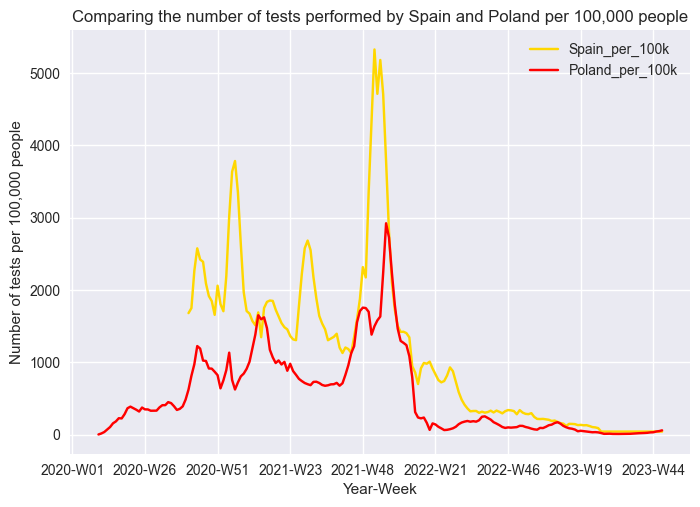

In [804]:
test_join.plot(color=['gold','red'])
plt.xlabel('Year-Week')
plt.ylabel('Number of tests per 100,000 people')
plt.title('Comparing the number of tests performed by Spain and Poland per 100,000 people')

As we can see, Spain carried out moire tests per citizen than Poland in general along this period. However, our source doesn't provide us valuable data from Spain for more than a half of the whole year 2020. Furthermore, we had to interpolate some missing data for Spain, which is quite extrange coming from an official European source. To invesigate further, it could be a good idea to search for data in national authorities websites.

## 4. Summary of our findings
In this last section, we're going to summarize the information and insights we got from our analysis and try to get some conclusions. 

### Infections vs. deaths
We've seen the evolution of COVID-19 infections, as well as the number of deceases. We can plot the side by side or, even better, in the same plot with 2 different y axes.

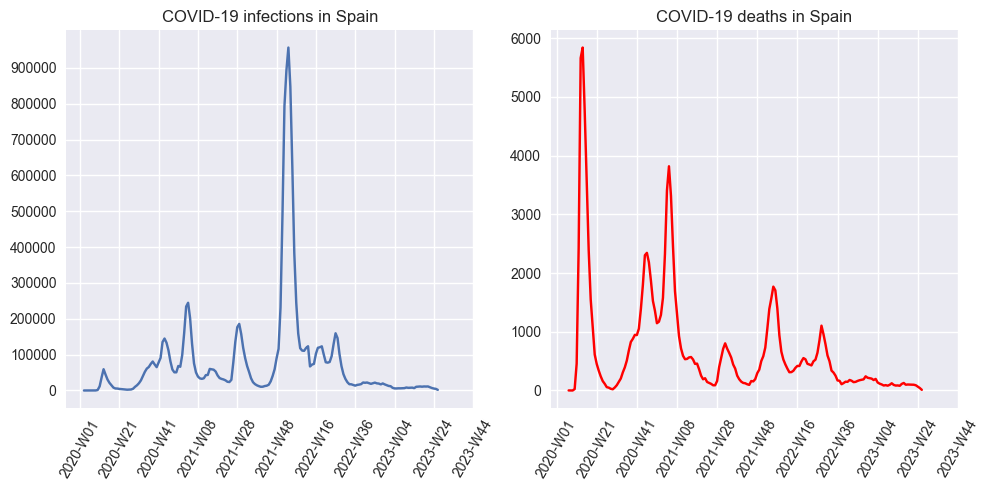

In [527]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10,5))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)

#Plotting in first axes - the left one
axs1.plot(cases_spain['year_week'], cases_spain['weekly_count'])
axs1.set_title("COVID-19 infections in Spain")

xticks = cases_spain['year_week'].iloc[0::20]
yticks = range(0,1000000,100000)
axs1.set_xticks(xticks)
axs1.set_yticks(yticks)
axs1.tick_params(axis='x', labelrotation=60)


# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.plot(deaths_spain['year_week'], deaths_spain['weekly_count'], color='red')
axs2.set_title("COVID-19 deaths in Spain")
xticks = deaths_spain['year_week'].iloc[0::20]
axs2.set_xticks(xticks)
axs2.tick_params(axis='x', labelrotation=60)
     
#Adding a Title for the Overall Figure

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

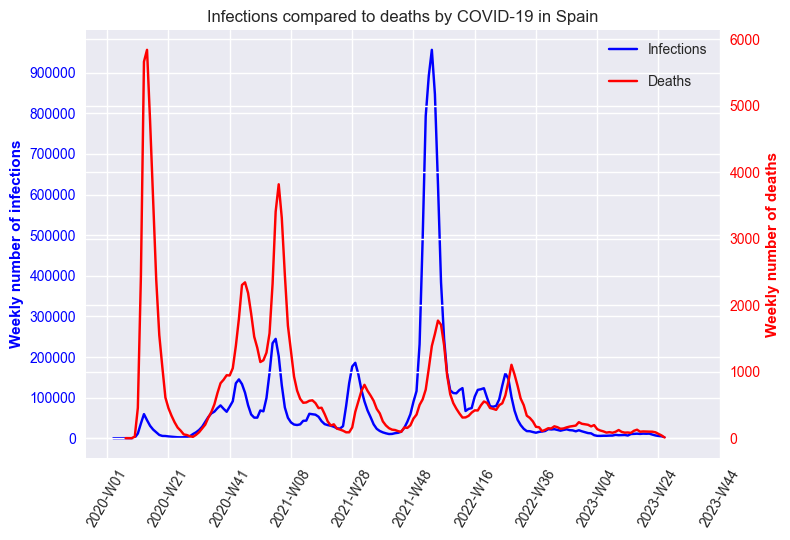

In [573]:
# Create a figure with Four axes - two rows, two columns
fig, axs1 = plt.subplots()

#Plotting in first axes
axs1.set_title('Infections compared to deaths by COVID-19 in Spain')
axs1.plot(cases_spain['year_week'], cases_spain['weekly_count'], color='blue', label='Infections')


xticks = cases_spain['year_week'].iloc[0::20]
yticks = range(0,1000000,100000)
axs1.set_xticks(xticks)
axs1.set_yticks(yticks)
axs1.tick_params(axis='x', labelrotation=60)
axs1.tick_params(colors='blue', axis='y')
axs1.set_ylabel('Weekly number of infections', color='blue', weight='bold')


# Add the second subplot 
axs2 = axs1.twinx()

axs2.plot(deaths_spain['year_week'], deaths_spain['weekly_count'], color='red', label='Deaths')
axs2.set_xticks(xticks)
axs2.tick_params(axis='x', labelrotation=60)
axs2.set_ylabel('Weekly number of deaths', color='red', weight='bold')
axs2.tick_params(colors='red', axis='y')
     
#Add legend
axs1.legend()
axs2.legend(loc=(0.817,0.85))
# Adjust spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

In this plot, we clearly see the how the different waves of the pandemic match. When there's a pick in infections, there's also a pick in deaths by COVID-19.<br><br>
In the first wave, we can see a devastating effect of the pandemic, reaching a pick of almost 6000 deceases in a week. This was fatal especially for elderly people, as well as immunosuppressant patients. The detection in this phase was not very high due to the lack of means for testing. After this first wave, the number of deaths dramatically drops thanks to the restricytions.<br><br>
The next two waves are almost overlapped. Here, the detections becomes more efficient, but there's still an important number of deaths. The people probably gets relaxed and, if we take a look to the frametime of the third wave, it's right after Christmas, were people wanted to see their relatives after a long confinement.<br><br>
The effects of vaccination are clearly visible in the next waves. The picks of deaths are not so high compared to the previous ones. The extremely high pick of detections takes places right during Christmas of 2021. Here, plenty of COVID tests were available at the pharmacies, so detection was easier. It also must be noted that by this time there were less restrictions that at the beginning of the pandemic.

### ICU and hospital occupancy
Another interesting insight was the hospital occupancy during the pandemic. The medical staff, especially in the ICUs, suffered a strong overload of work since the hospitals were at almost a 100 % of ICU occupancy.

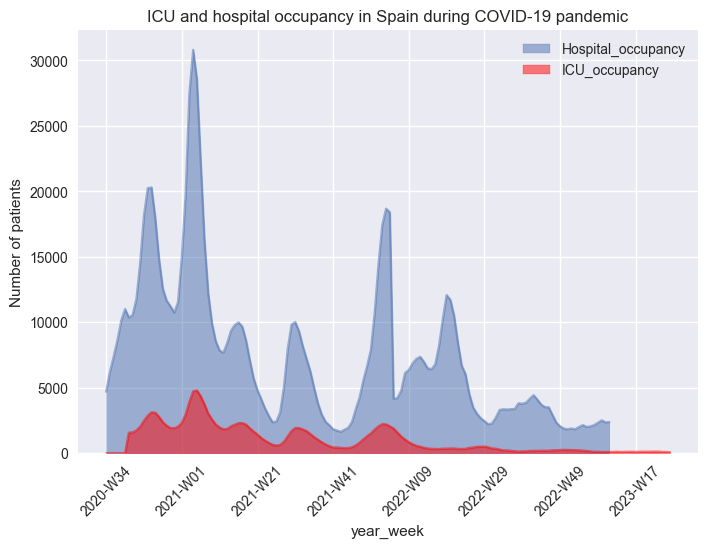

In [574]:
ax = sp_daily_occ.plot(kind='area',stacked=False)
sp_daily_icu_concat.plot(kind='area', ax=ax, color='red',alpha=0.5)

ax.set_title('ICU and hospital occupancy in Spain during COVID-19 pandemic')
ax.set_ylabel('Number of patients')
ax.tick_params(axis='x', labelrotation=45)
plt.show()

Despite a lack of data from the first part of the year 2020, we can see a high occupancy at hospitals and their ICU's. By the end of 2020, the vaccination campaing started and clearly helped to reduce the workloads in hospitals in the mid-term, which was a release for all the medical staff around the country.

### Vaccination
regarding the vaccination rates, we found out that a huge effort was made to immunize the whole country.

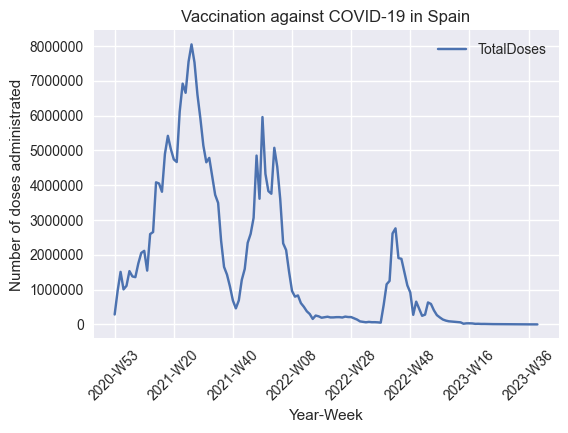

In [805]:
sp_vaccination.plot(x='year_week', y='TotalDoses', figsize=(6,4))
plt.xticks(rotation = 45)
plt.title('Vaccination against COVID-19 in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of doses administrated')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Here, there's a pick of 8 million doses administrated in just one week. First and second doses were given in those first 2 waves. Further, they're mostly reinforcement doses.

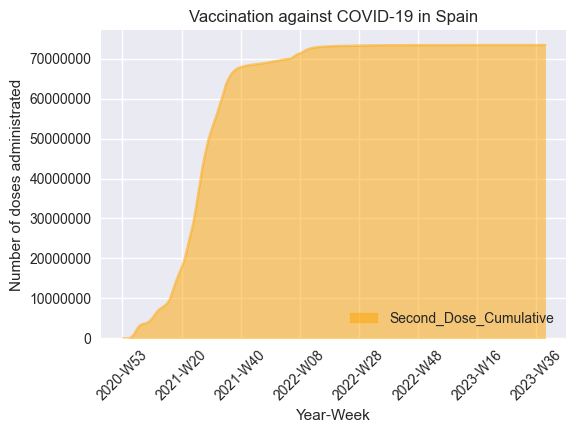

In [806]:
sp_vaccination.plot(kind='area', x='year_week', y=['Second_Dose_Cumulative'], figsize=(6,4), color='orange', alpha=0.5)
plt.xticks(rotation = 45)
plt.title('Vaccination against COVID-19 in Spain')
plt.xlabel('Year-Week')
plt.ylabel('Number of doses administrated')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

The cumulative of second doses shows how in 1 year, over the 70 % of Spaniards had a completed vaccination cycle (2 doses). Around 70 milion vaccines were administrated during 2021.

### Testing comparison
We wanted to use the testing dataset for comparing two countries, In this case, Poland and Spain, to see the efforts made by each one in terms of testing per 100,000 people. we've seen Spain put more means, but also a lack of data in some periods of the pandemic produced an incomplete analysis.

Text(0.5, 1.0, 'Comparing the number of tests performed by Spain and Poland per 100,000 people')

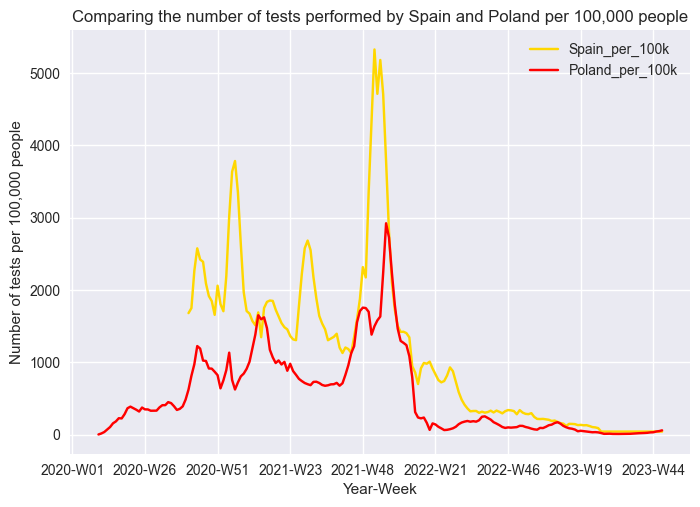

In [807]:
test_join.plot(color=['gold','red'])
plt.xlabel('Year-Week')
plt.ylabel('Number of tests per 100,000 people')
plt.title('Comparing the number of tests performed by Spain and Poland per 100,000 people')

# 5. Conclusions
This was an interesting project to take. Looking back over the past years, highlights the devastating effect that the pandemic had, especially at first, and how the population responded, with responsibility to stay home, keep safety distance and getting the vaccine to defeat the virus. Other insights I got from this work are:
<ul>
<li>It definetly helped me to <b>improve my skills in Python</b> when it comes to cleaning datasets and plotting the results properly. I had to spend some time <b>reading the documentation</b> of pandas methods, as well as matplotlib options to plot different type of charts to properly<b> show the data in a visual and meaningful way</b>.</li><br>
<li>The importance of<b> knowing and getting familiar with the datasets</b>. It is essential to know what are you dealing with to properly clean and get the insights you want.</li><br>
<li>The sources must provide<b> complete and reliable data</b>. For that, I wanted to use an official European organization such as the ECDC. However, I could verify that ther were some missing data in the datasets. It was the case of some flaws in the Spanish data, probably due to a poor communication between the national and European institutions. There are ways to <b>deal with this missing data</b>, as it was shown, which is something that it's inevitable sometimes.</li><br>
<li><b>It's OK to be curious</b>. It's actually good. That's the best way to get<b> hidden insights</b> that you wouldn't expect at first, and also to<b> learn new methods</b>. When you want to achieve something that don't know how to do, you always discover new methods and options in Python that might be usefull in the future.</li><br>
<li>Sometimes, being curious can also lead you to a dead end, but it's also OK. For example, I've tryied to compare the doses administrated by different countries. However, something was wrong when adding up the total doses, resulting into astronomic numbers. Here, I realized I was doing something wrong, since those results were unfeasible. It's then we I thought that it's of upmost importance to be able to<b> see when some data is unrealistic, therefore the results are wrong</b>. If I neglected that, it would produce wrong results.</li><br>
<li>Dealing with such large datasets can be overwhelming. But by applying the Data Science methodology, step by step, makes it easier. Keeping a well structured and organized work makes eveerything more efficient, with better results </li><br>
</ul>
